Task 5
Implement the $\text{MinCount}(k, h, M)$ algorithm and test it:

In [1]:
from pprint import pprint
from typing import List, Union

import numpy as np
from matplotlib import pyplot as plt

import data_stream_utils as dsu
from min_count_algorithm import MinCount

HASH_FUNCTION_NAME = "sha256"
HASH_BIT_LENGTH = 64
HIGHEST_K = 452
SAVE_FIGURES = False

import importlib
import math

importlib.reload(dsu)

<module 'data_stream_utils' from '/home/gabriel/white_rose/distributed_algorithms/Labs/list_2/data_stream_utils.py'>

- Consider the multisets $M_n = (S_n , m)$ such that $|S_n| = n$ for $n = 1, 2, . . . , 10^4$ and all sets $S_n$ are disjoint. Does changing the $m$ function affect the value of the $\hat{n}$ estimation obtained in the algorithm?

In [2]:
min_count = MinCount(M_length=HIGHEST_K,
                     h=dsu.define_hash(bit_length=HASH_BIT_LENGTH, hash_function_name=HASH_FUNCTION_NAME))

for _, range_start, range_end in dsu.disjoint_ranges_generator():
    mul_verification_array = []
    for i, multiplicity_range in enumerate([1, 2, (1, 3)]):
        data_stream = dsu.generate_multiset(elements_range=(range_start, range_end),
                                            multiplicity_range=multiplicity_range)
        min_count.replace_data_stream(data_stream=data_stream)
        min_count.consume_data_stream()
        n_hat = min_count.estimate_number_of_elements()
        mul_verification_array.append(n_hat)  # add n_hat cord

    # if all elements are equal, thus multiplicity has no impact.
    if not all(elem == mul_verification_array[0] for elem in mul_verification_array):
        raise Exception("Multiplicity have impact.")
print("Multiplicity has no impact.")

KeyboardInterrupt: 

- For $k = 2, 3, 10, 100, 400$ and multisets from previous subtask draw a graph with $n$ on the horizontal axis and $\frac{\hat{n}}{n}$ on the vertical axis.

In [49]:
def plot_subtask_b(data: List[List[Union[int, float]]]):
    # Create the figure and subplots
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

    # Add each scatter plot to the main plot and each subplot
    n_range = range(1, len(data[0]) + 1)
    axs[0, 0].scatter(x=n_range, y=data[0], c='blue', label='k=2', s=1)
    axs[0, 1].scatter(x=n_range, y=data[1], c='green', label='k=3', s=1)
    axs[0, 2].scatter(x=n_range, y=data[2], c='olive', label='k=10', s=1)
    axs[1, 0].scatter(x=n_range, y=data[3], c='magenta', label='k=100', s=1)
    axs[1, 1].scatter(x=n_range, y=data[4], c='cyan', label='k=400', s=1)

    axs[1, 2].scatter(x=n_range, y=data[0], c='blue', label='k=2', s=1)
    axs[1, 2].scatter(x=n_range, y=data[1], c='green', label='k=3', s=1)
    axs[1, 2].scatter(x=n_range, y=data[2], c='olive', label='k=10', s=1)
    axs[1, 2].scatter(x=n_range, y=data[3], c='magenta', label='k=100', s=1)
    axs[1, 2].scatter(x=n_range, y=data[4], c='cyan', label='k=400', s=1)

    # Set titles for the main plot and subplots
    axs[0, 0].set_title('k=2')
    axs[0, 1].set_title('k=3')
    axs[0, 2].set_title('k=10')
    axs[1, 0].set_title('k=100')
    axs[1, 1].set_title('k=400')
    axs[1, 2].set_title('Merged results for all values of k.')

    for ax in axs.flat:
        ax.set_xlabel('n')
        ax.set_ylabel(r'$\frac{\hat{n}}{n}$', rotation=0)
        ax.legend()

    fig.suptitle(r'$\frac{\hat{n}}{n}$ for different k values. (Task 5.b)')
    plt.legend()
    if SAVE_FIGURES is True:
        plt.savefig('figures/task_5_subtask_b_fig.png')
    plt.show()

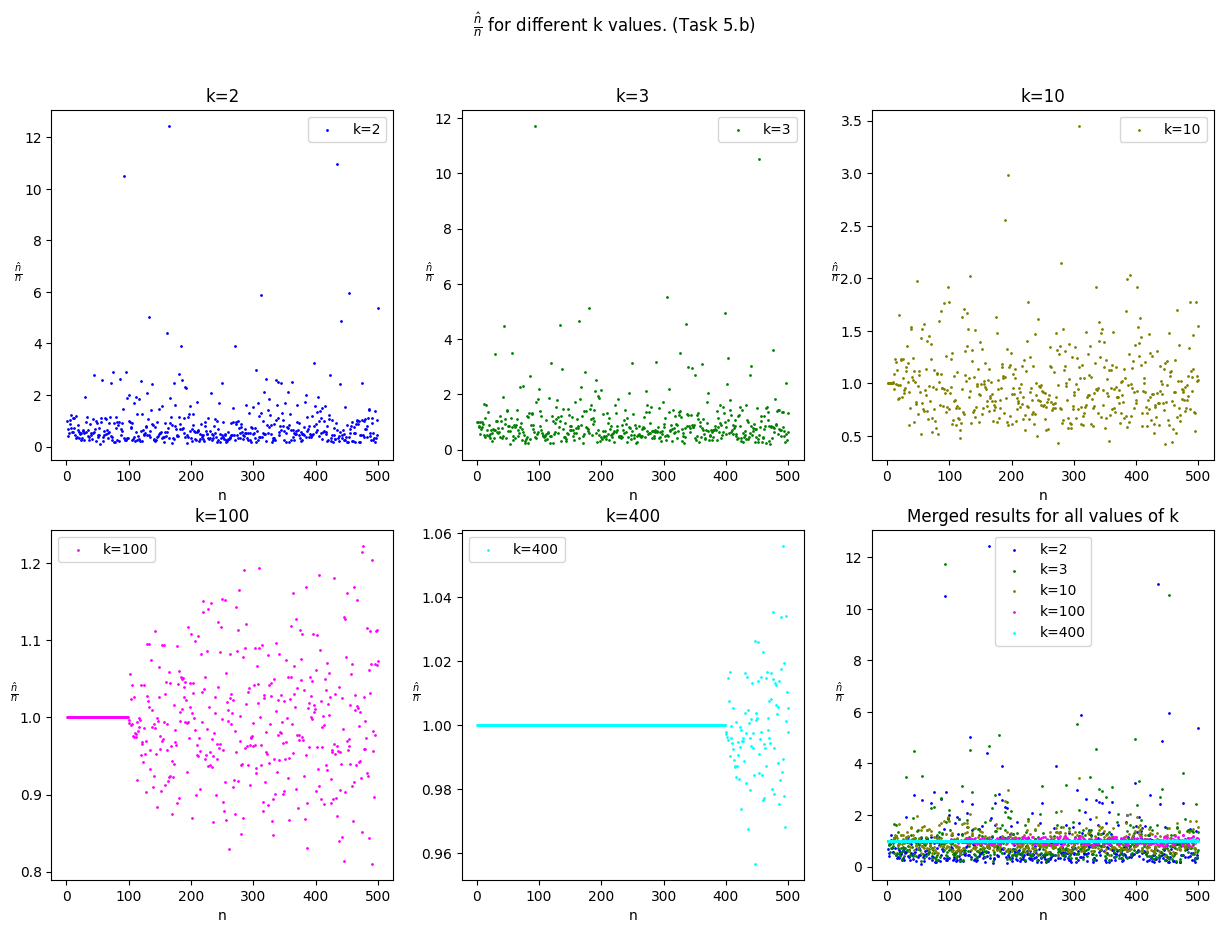

In [50]:
min_count = MinCount(M_length=-1,
                     h=dsu.define_hash(bit_length=HASH_BIT_LENGTH, hash_function_name=HASH_FUNCTION_NAME))
plot_data = [[], [], [], [], []]
for dim, k in enumerate([2, 3, 10, 100, 400]):
    min_count.replace_M_length(M_length=k)
    for n, range_start, range_end in dsu.disjoint_ranges_generator():
        data_stream = dsu.generate_multiset(elements_range=(range_start, range_end))
        min_count.replace_data_stream(data_stream=data_stream)
        min_count.consume_data_stream()
        n_hat = min_count.estimate_number_of_elements()
        plot_data[dim].append(n_hat / n)

plot_subtask_b(data=plot_data)

- Experimentally adjust the value of $k$ so that there is $95\%$ probability that $|\frac{\hat{n}}{n} − 1| < 10\%$.

In [7]:
def plot_subtask_c(data: List[List[Union[int, float]]]):
    n_range = range(1, len(data) + 1)
    plt.scatter(x=n_range, y=data, c='red', s=1)
    plt.xlabel('n')
    plt.ylabel('k')
    plt.title(r'Plotting $k$ such that $|\frac{\hat{n}}{n} - 1| < 0.1$. (Task 5.c)')
    if SAVE_FIGURES is True:
        plt.savefig('figures/task_5_subtask_c_fig.png')
    plt.show()

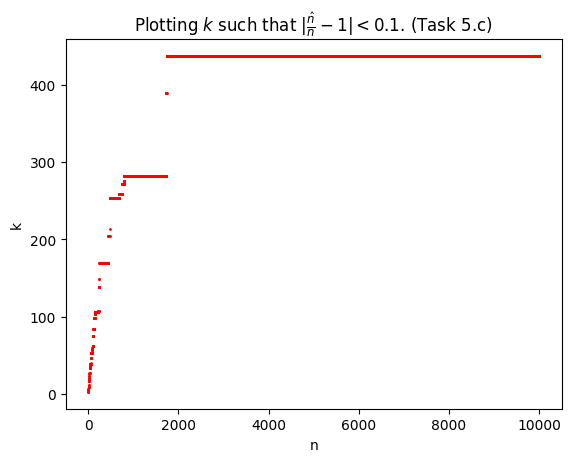

In [19]:
k = 1
min_count = MinCount(M_length=k,
                     h=dsu.define_hash(bit_length=HASH_BIT_LENGTH, hash_function_name=HASH_FUNCTION_NAME))
exp_result = []
plot_data = []
n_hat = None
for n, range_start, range_end in dsu.disjoint_ranges_generator():
    data_stream = dsu.generate_multiset(elements_range=(range_start, range_end))
    min_count.replace_data_stream(data_stream=data_stream)
    min_count.consume_data_stream()
    n_hat = min_count.estimate_number_of_elements()
    exp_result.append(n_hat / n)
    while dsu.get_in_bands_percent(data=exp_result) < 0.95:
        data_stream = dsu.generate_multiset(elements_range=(range_start, range_end))
        min_count.replace_data_stream(data_stream=data_stream)
        min_count.consume_data_stream()
        n_hat = min_count.estimate_number_of_elements()
        k += 1
        min_count.replace_M_length(M_length=k)
        exp_result[-1] = n_hat / n
    plot_data.append(k)

plot_subtask_c(data=plot_data)

# Task 6
Test the $\text{MinCount}(k, h, M)$ algorithm for different hash functions $h : S \rightarrow \{0, 1\}^B$ and different values of parameter $B$. Try to find or propose a hash function $h$ for which the accuracy of the algorithm is significantly worse than predicated by the analysis. Explain what causes this loss of accuracy. What else can matter besides the value of the B parameter?

In [ ]:
pprint(dsu.HASH_FUNCTIONS_DICT)

In [ ]:
class BadHash:
    def __init__(self, data):
        self.data = data

    def hexdigest(self):
        hash_value = 0
        for byte in self.data:
            hash_value += byte
            hash_value = hash_value % 2 ** 256
        hash_value += 2 ** 8
        return format(hash_value, '32x')

In [20]:
def plot_diff_hash_fun(data: List[List[Union[int, float]]]):
    # Create the figure and subplots
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

    # Add each scatter plot to the main plot and each subplot
    n_range = range(1, len(data[0]) + 1)
    axs[0, 0].scatter(x=n_range, y=data[0], c='blue', s=1)
    axs[0, 1].scatter(x=n_range, y=data[1], c='green', s=1)
    axs[0, 2].scatter(x=n_range, y=data[2], c='olive', s=1)
    axs[1, 0].scatter(x=n_range, y=data[3], c='magenta', s=1)
    axs[1, 1].scatter(x=n_range, y=data[4], c='cyan', s=1)

    axs[1, 2].scatter(x=n_range, y=data[0], c='blue', label='sha1', s=1)
    axs[1, 2].scatter(x=n_range, y=data[1], c='green', label='sha256', s=1)
    axs[1, 2].scatter(x=n_range, y=data[2], c='olive', label='blake2b', s=1)
    axs[1, 2].scatter(x=n_range, y=data[3], c='magenta', label='md5', s=1)
    axs[1, 2].scatter(x=n_range, y=data[4], c='cyan', label='bad_hash', s=1)

    # Set titles for the main plot and subplots
    axs[0, 0].set_title('sha1')
    axs[0, 1].set_title('sha256')
    axs[0, 2].set_title('blake2b')
    axs[1, 0].set_title('md5')
    axs[1, 1].set_title('bad_hash')
    axs[1, 2].set_title('Merged results for all hash functions.')

    for ax in axs.flat:
        ax.set_xlabel('n')
        ax.set_ylabel(r'$\frac{\hat{n}}{n}$', rotation=0)
        ax.legend()

    fig.suptitle(r'$\frac{\hat{n}}{n}$ for different hash functions.')
    plt.legend()
    if SAVE_FIGURES is True:
        plt.savefig('figures/task_6_different_hash_functions_fig.png')
    plt.show()

doing hash_function_name='sha1'
doing hash_function_name='sha256'
doing hash_function_name='blake2b'
doing hash_function_name='md5'
doing hash_function_name='bad_hash'


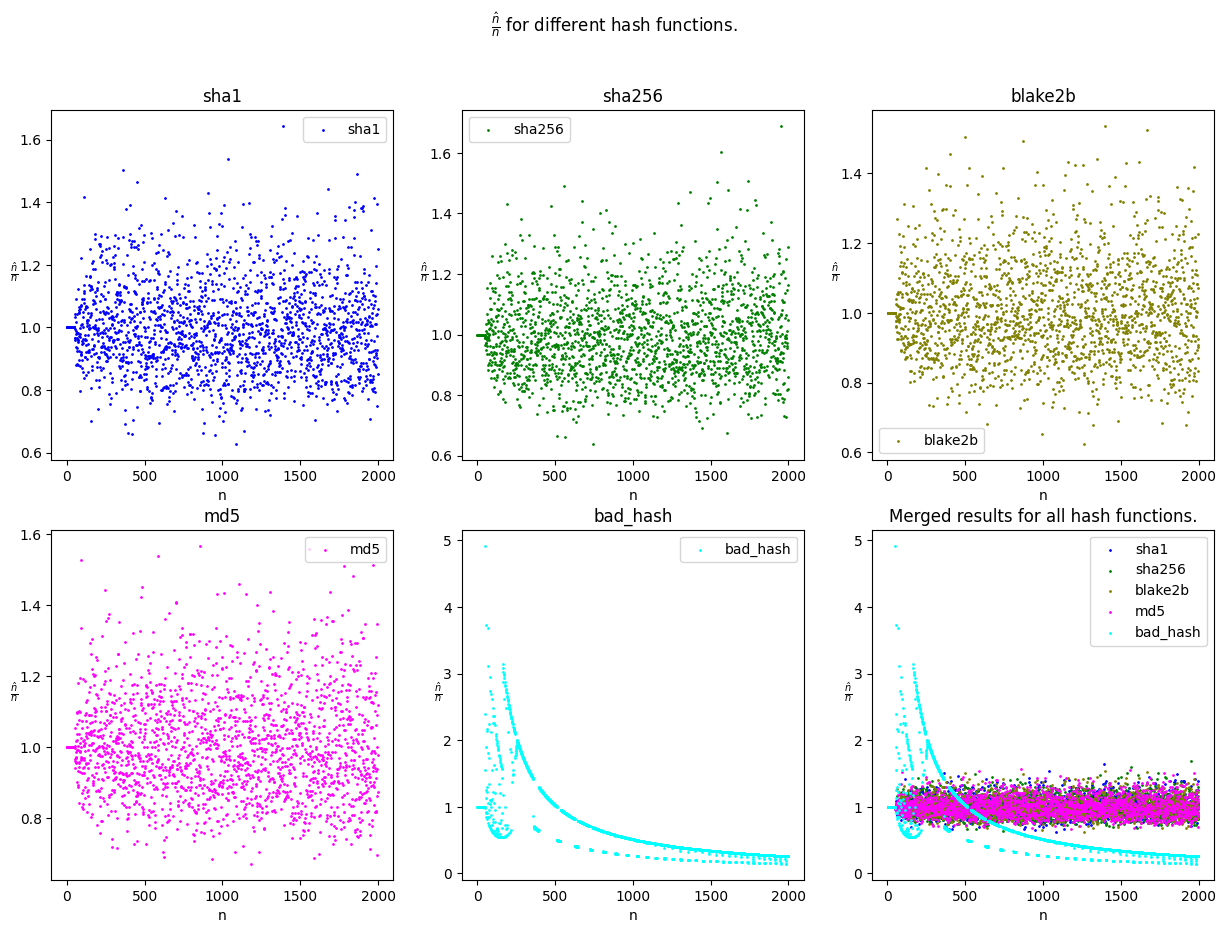

In [29]:
plot_data = [[], [], [], [], [], []]
for i, (hash_function_name, hash_function) in enumerate(dsu.HASH_FUNCTIONS_DICT.items()):
    print(f"doing {hash_function_name=}")
    min_count = MinCount(M_length=50,
                         h=dsu.define_hash(bit_length=HASH_BIT_LENGTH, hash_function_name=hash_function_name))
    for n, range_start, range_end in dsu.disjoint_ranges_generator(upper_bound=2000):
        data_stream = dsu.generate_multiset(elements_range=(range_start, range_end))
        min_count.replace_data_stream(data_stream=data_stream)
        min_count.consume_data_stream()
        n_hat = min_count.estimate_number_of_elements()
        plot_data[i].append(n_hat / n)

plot_diff_hash_fun(data=plot_data)

In [158]:
def plot_diff_hash_bit_length(data: List[List[Union[int, float]]]):
    # Create the figure and subplots
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

    # Add each scatter plot to the main plot and each subplot
    n_range = range(1, len(data[0]) + 1)
    axs[0, 0].scatter(x=n_range, y=data[0], c='blue', s=1)
    axs[0, 1].scatter(x=n_range, y=data[1], c='green', s=1)
    axs[0, 2].scatter(x=n_range, y=data[2], c='olive', s=1)
    axs[1, 0].scatter(x=n_range, y=data[3], c='magenta', s=1)
    axs[1, 1].scatter(x=n_range, y=data[4], c='cyan', s=1)

    axs[1, 2].scatter(x=n_range, y=data[0], c='blue', label='hash_bit_length=8', s=1)
    axs[1, 2].scatter(x=n_range, y=data[1], c='green', label='hash_bit_length=16', s=1)
    axs[1, 2].scatter(x=n_range, y=data[2], c='olive', label='hash_bit_length=24', s=1)
    axs[1, 2].scatter(x=n_range, y=data[3], c='magenta', label='hash_bit_length=28', s=1)
    axs[1, 2].scatter(x=n_range, y=data[4], c='cyan', label='hash_bit_length=32', s=1)

    # Set titles for the main plot and subplots
    axs[0, 0].set_title('hash_bit_length=8')
    axs[0, 1].set_title('hash_bit_length=16')
    axs[0, 2].set_title('hash_bit_length=24')
    axs[1, 0].set_title('hash_bit_length=28')
    axs[1, 1].set_title('hash_bit_length=32')
    axs[1, 2].set_title('Merged results for all hash functions lengths.')
    axs[1, 2].legend()


    for ax in axs.flat:
        ax.set_xlabel('n')
        ax.set_ylabel(r'$\frac{\hat{n}}{n}$', rotation=0)

    fig.suptitle(r'$\frac{\hat{n}}{n}$ for different hash functions lengths.')
    plt.legend()
    if SAVE_FIGURES is True:
        plt.savefig('figures/task_6_different_hash_bit_lengths_fig.png')
    plt.show()

doing hash_bit_length=8
doing hash_bit_length=16
doing hash_bit_length=24
doing hash_bit_length=28
doing hash_bit_length=32


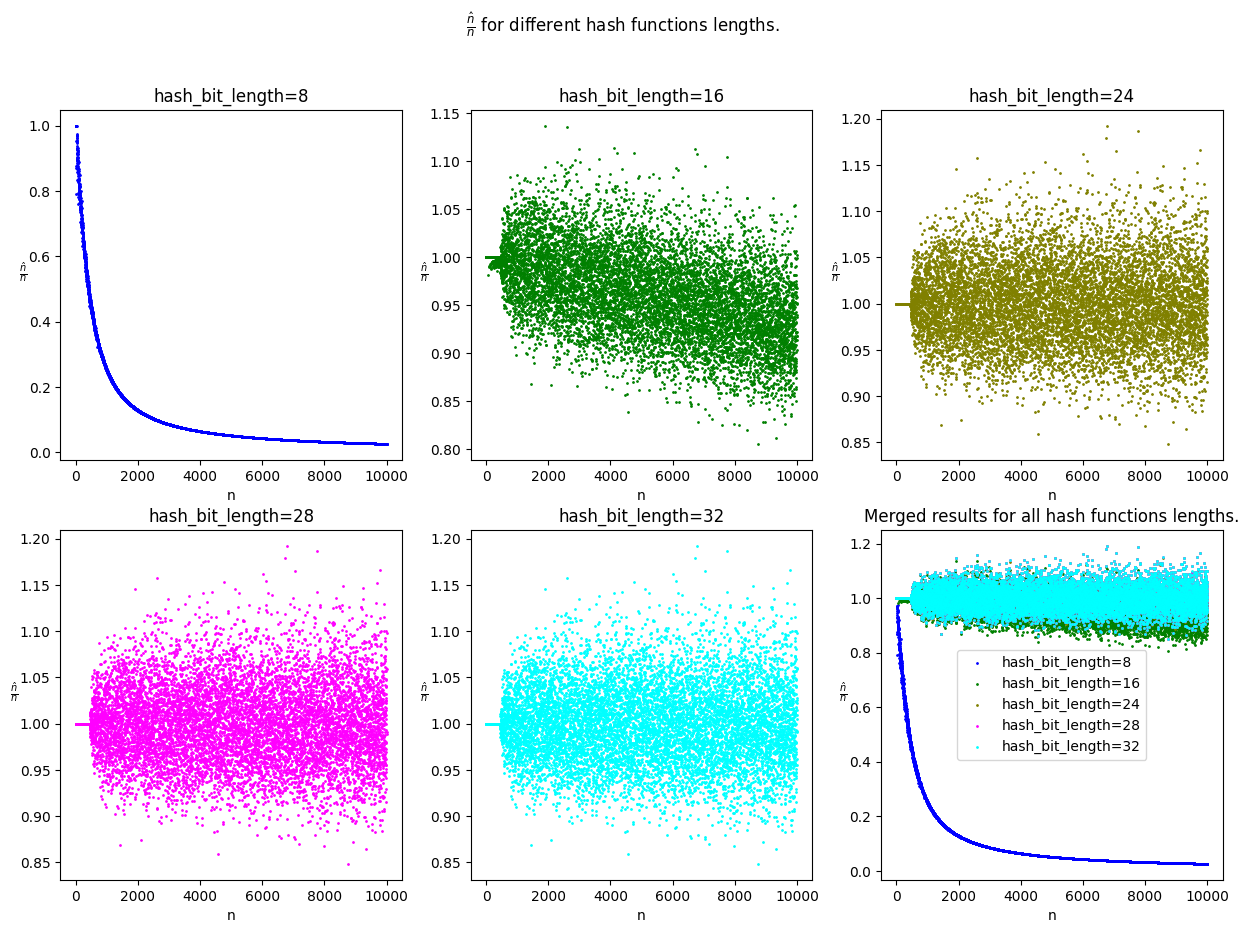

In [159]:
plot_data = [[], [], [], [], [], []]
for i, hash_bit_length in enumerate([8, 16, 24, 28, 32]):
    print(f"doing {hash_bit_length=}")
    min_count = MinCount(M_length=HIGHEST_K,
                         h=dsu.define_hash(bit_length=hash_bit_length, hash_function_name=HASH_FUNCTION_NAME))
    for n, range_start, range_end in dsu.disjoint_ranges_generator():
        data_stream = dsu.generate_multiset(elements_range=(range_start, range_end))
        min_count.replace_data_stream(data_stream=data_stream)
        min_count.consume_data_stream()
        n_hat = min_count.estimate_number_of_elements()
        plot_data[i].append(n_hat / n)

plot_diff_hash_bit_length(data=plot_data)

# Task 7
Your task is to compare the theoretical concentration results for the $\hat{n}$ estimator used in the $\text{MinCount}(k, h, M)$ algorithm obtained by
- Chebyshev’s inequality,
- Chernoff’s inequality,
- with simulation results.

Namely, for $n = 1, 2, . . . 10^4$ , $k = 400$ and $\alpha = 5\%, 1\%, 0.5\%$ plot values of $\frac{\hat{n}}{n}$ obtained in simulation and values $1 − \delta$ and $1 + \delta$ such that

$$ Pr[1 - \delta \lt \frac{\hat{n}}{n} \lt 1 + \delta ] \gt 1 - \alpha$$

In [31]:
k = 400

## Chebyshev’s inequality
$$ P(|X - E[X]| < \delta) > 1 - \frac{\text{Var}(X)}{\delta^2} $$

In our case
$$ X = \frac{\hat{n}}{n} $$
$$ E[X] = 1 $$
$$ \text{Var}(X) = \frac{1}{k}, $$

so we end up with
$$ P[|\frac{\hat{n}}{n} - 1| < \delta] > 1 - \frac{1}{k \cdot \delta^2} $$
$$ P[1 - \delta \lt \frac{\hat{n}}{n} \lt 1 + \delta] > 1 - \frac{1}{k \cdot \delta^2}. $$

We look for $\delta$ in equation
$$ \alpha = \frac{1}{k \cdot \delta^2}. $$

What yields us
$$ \delta = \sqrt{1/(k\cdot\alpha)}. $$

In [32]:
def get_chebyshev_delta(alpha):
    return math.sqrt(1 / (k * alpha))

## Chernoff’s inequality
We define
$$ f_k(x) = e^{xk}(1-x)^k $$

then, from the lecture we know that
$$ P[1 - \delta \lt \frac{\hat{n}}{n} \lt 1 + \delta] > 1 - f_k(\frac{\delta}{1 - \delta}) - f_k(\frac{\delta}{1 + \delta}). $$

What gives us that
$$ \alpha = f_k(\frac{\delta}{1 - \delta}) - f_k(\frac{\delta}{1 + \delta}). $$


In [33]:
# def bisection(f, a, b, tol=1e-6, max_iters=100):
#     # Check that the sign of f(a) and f(b) are different
#     if f(a) * f(b) >= 0:
#         raise ValueError("The function f(a) and f(b) must have opposite signs")
#
#     # Initialize the midpoint and the iteration counter
#     c = (a + b) / 2
#     n_iters = 0
#
#     while abs(f(c)) > tol and n_iters < max_iters:
#         if f(a) * f(c) < 0:
#             b = c
#         else:
#             a = c
#         c = (a + b) / 2
#         n_iters += 1
#     return c



In [152]:
from scipy.optimize import minimize_scalar


def f_k(x):
    return np.exp(k * x) * (1 - x) ** k


def chernoff_func(alpha):
    return lambda x: f_k(x / (1 + x)) + f_k(x / (1 - x)) - alpha


def get_chernoff_delta(alpha):
    return minimize_scalar(fun=chernoff_func(alpha), bounds=(0.01, 0.2)).x


## Empirically

In [153]:
def emp_func(data, alpha):
    return lambda x: dsu.check_margin(data, x) - 1 + alpha


def get_empirical_delta(data, alpha):
    # print(root(fun=emp_func(data=data, alpha=alpha), x0=np.array([1])))
    return minimize_scalar(fun=emp_func(data=data, alpha=alpha), bounds=(0.01, 0.2)).x

In [154]:
def put_axhlines(ax, alpha, data):
    chebyshev_delta = get_chebyshev_delta(alpha)
    chernoff_delta = get_chernoff_delta(alpha)
    empirical_delta = get_empirical_delta(data=data, alpha=alpha)
    ax.axhline(1 + chebyshev_delta, linestyle='--', label=f'{chebyshev_delta=}', color='black')
    ax.axhline(1 - chebyshev_delta, linestyle='--', color='black')
    ax.axhline(1 + chernoff_delta, linestyle='--', label=f'{chernoff_delta=}', color='gray')
    ax.axhline(1 - chernoff_delta, linestyle='--', color='gray')
    ax.axhline(1 + empirical_delta, linestyle='--', label=f'{empirical_delta=}', color='green')
    ax.axhline(1 - empirical_delta, linestyle='--', color='green')


def plot_task_7(data: List[List[Union[int, float]]]):
    # Create the figure and subplots
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(30, 20))

    # Add each scatter plot to the main plot and each subplot
    n_range = range(1, len(data) + 1)

    alpha = 0.05
    axs[0].scatter(x=n_range, y=data, c='blue', s=2)
    put_axhlines(ax=axs[0], alpha=alpha, data=data)

    alpha = 0.01
    axs[1].scatter(x=n_range, y=data, c='blue', s=2)
    put_axhlines(ax=axs[1], alpha=alpha, data=data)

    alpha = 0.005
    axs[2].scatter(x=n_range, y=data, c='blue', s=2)
    put_axhlines(ax=axs[2], alpha=alpha, data=data)

    for ax in axs.flat:
        ax.set_xlabel('n')
        ax.set_ylabel(r'$\frac{\hat{n}}{n}$', rotation=0)
        ax.legend()

    fig.suptitle(r'Chebyshev, Chernoff and empirical bounds for $\alpha $\in \{0.05, 0.01, 0.005\}$.')
    plt.legend()
    if SAVE_FIGURES is True:
        plt.savefig('figures/task_7_fig.png')
    plt.show()

counter/len(data)=0.0
counter/len(data)=0.7753550710142029
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.7753550710142029
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
counter/len(data)=0.0
co

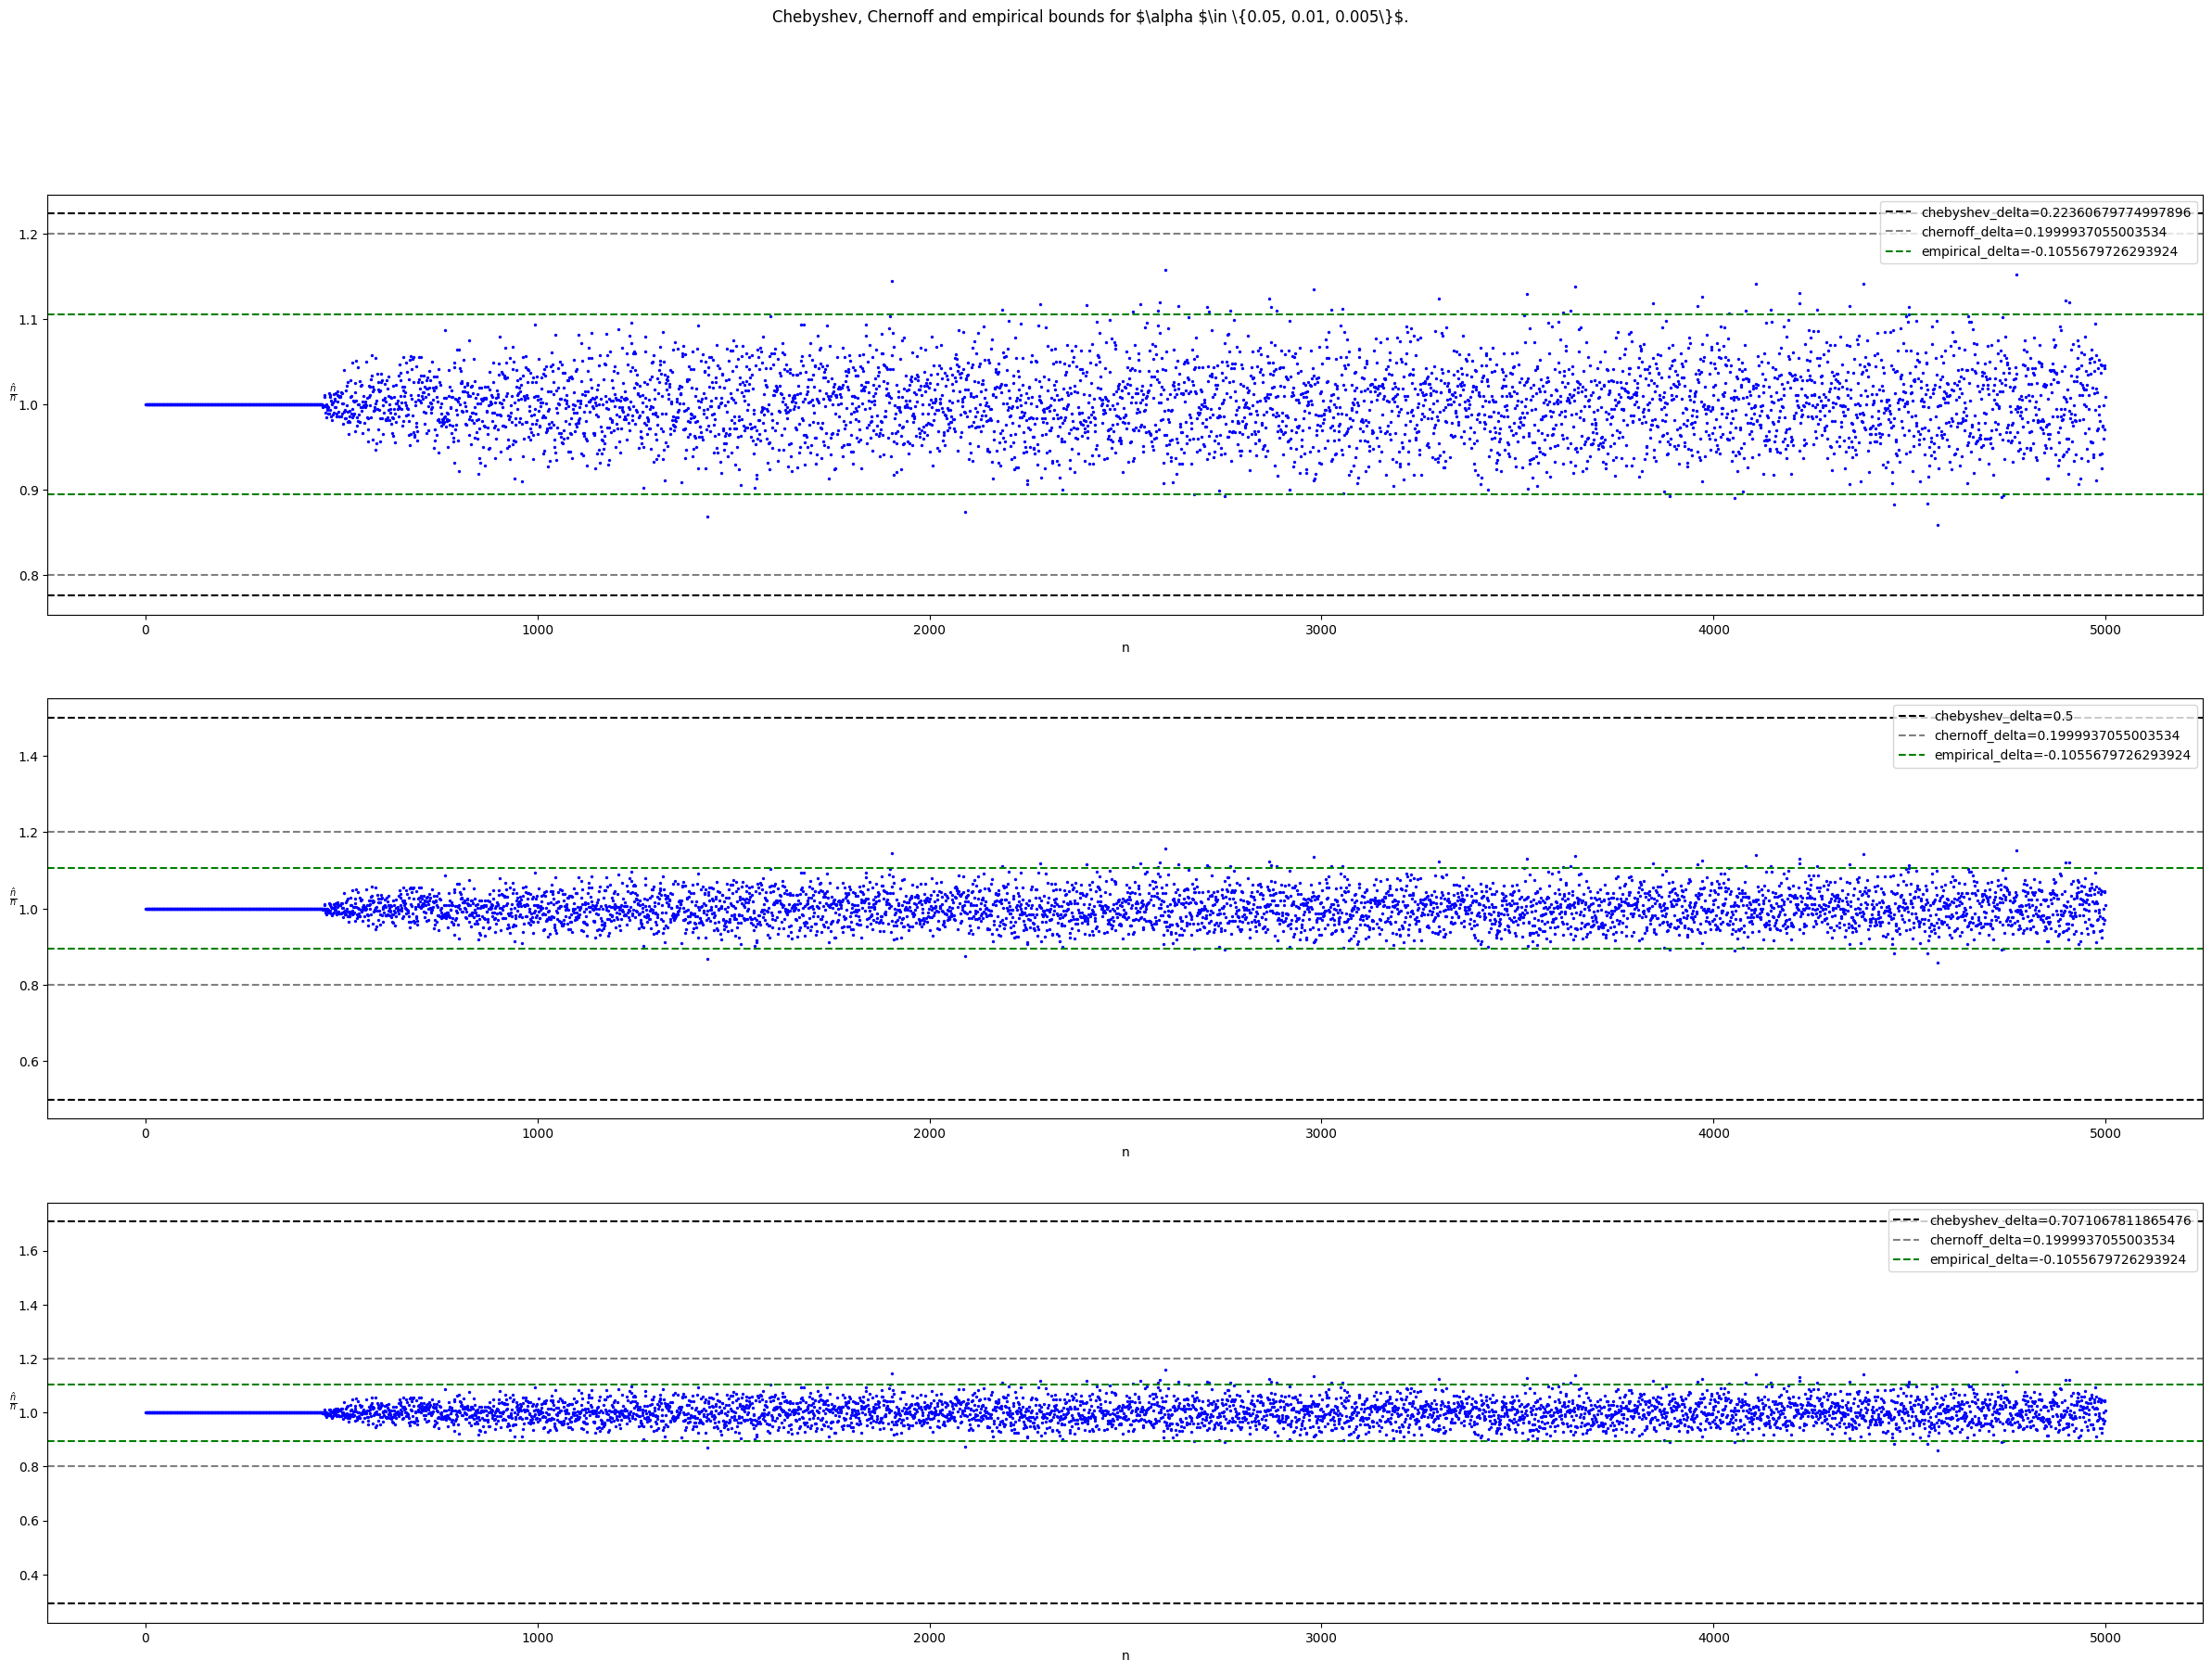

counter/len(data)=0.9623924784956991
counter/len(data)=0.9977995599119824
counter/len(data)=0.8387677535507101
counter/len(data)=0.6717343468693738
counter/len(data)=0.54250850170034
counter/len(data)=0.4450890178035607
counter/len(data)=0.3802760552110422
counter/len(data)=0.34126825365073016
counter/len(data)=0.3160632126425285
counter/len(data)=0.2986597319463893
counter/len(data)=0.2882576515303061
counter/len(data)=0.28025605121024205
counter/len(data)=0.27705541108221643
counter/len(data)=0.2740548109621924
counter/len(data)=0.27265453090618125
counter/len(data)=0.272254450890178
counter/len(data)=0.27185437087417486
counter/len(data)=0.27145429085817163
counter/len(data)=0.27125425085017
counter/len(data)=0.2710542108421684
counter/len(data)=0.2710542108421684
counter/len(data)=0.2710542108421684
counter/len(data)=0.9623924784956991
counter/len(data)=0.9977995599119824
counter/len(data)=0.8387677535507101
counter/len(data)=0.6717343468693738
counter/len(data)=0.54250850170034
co

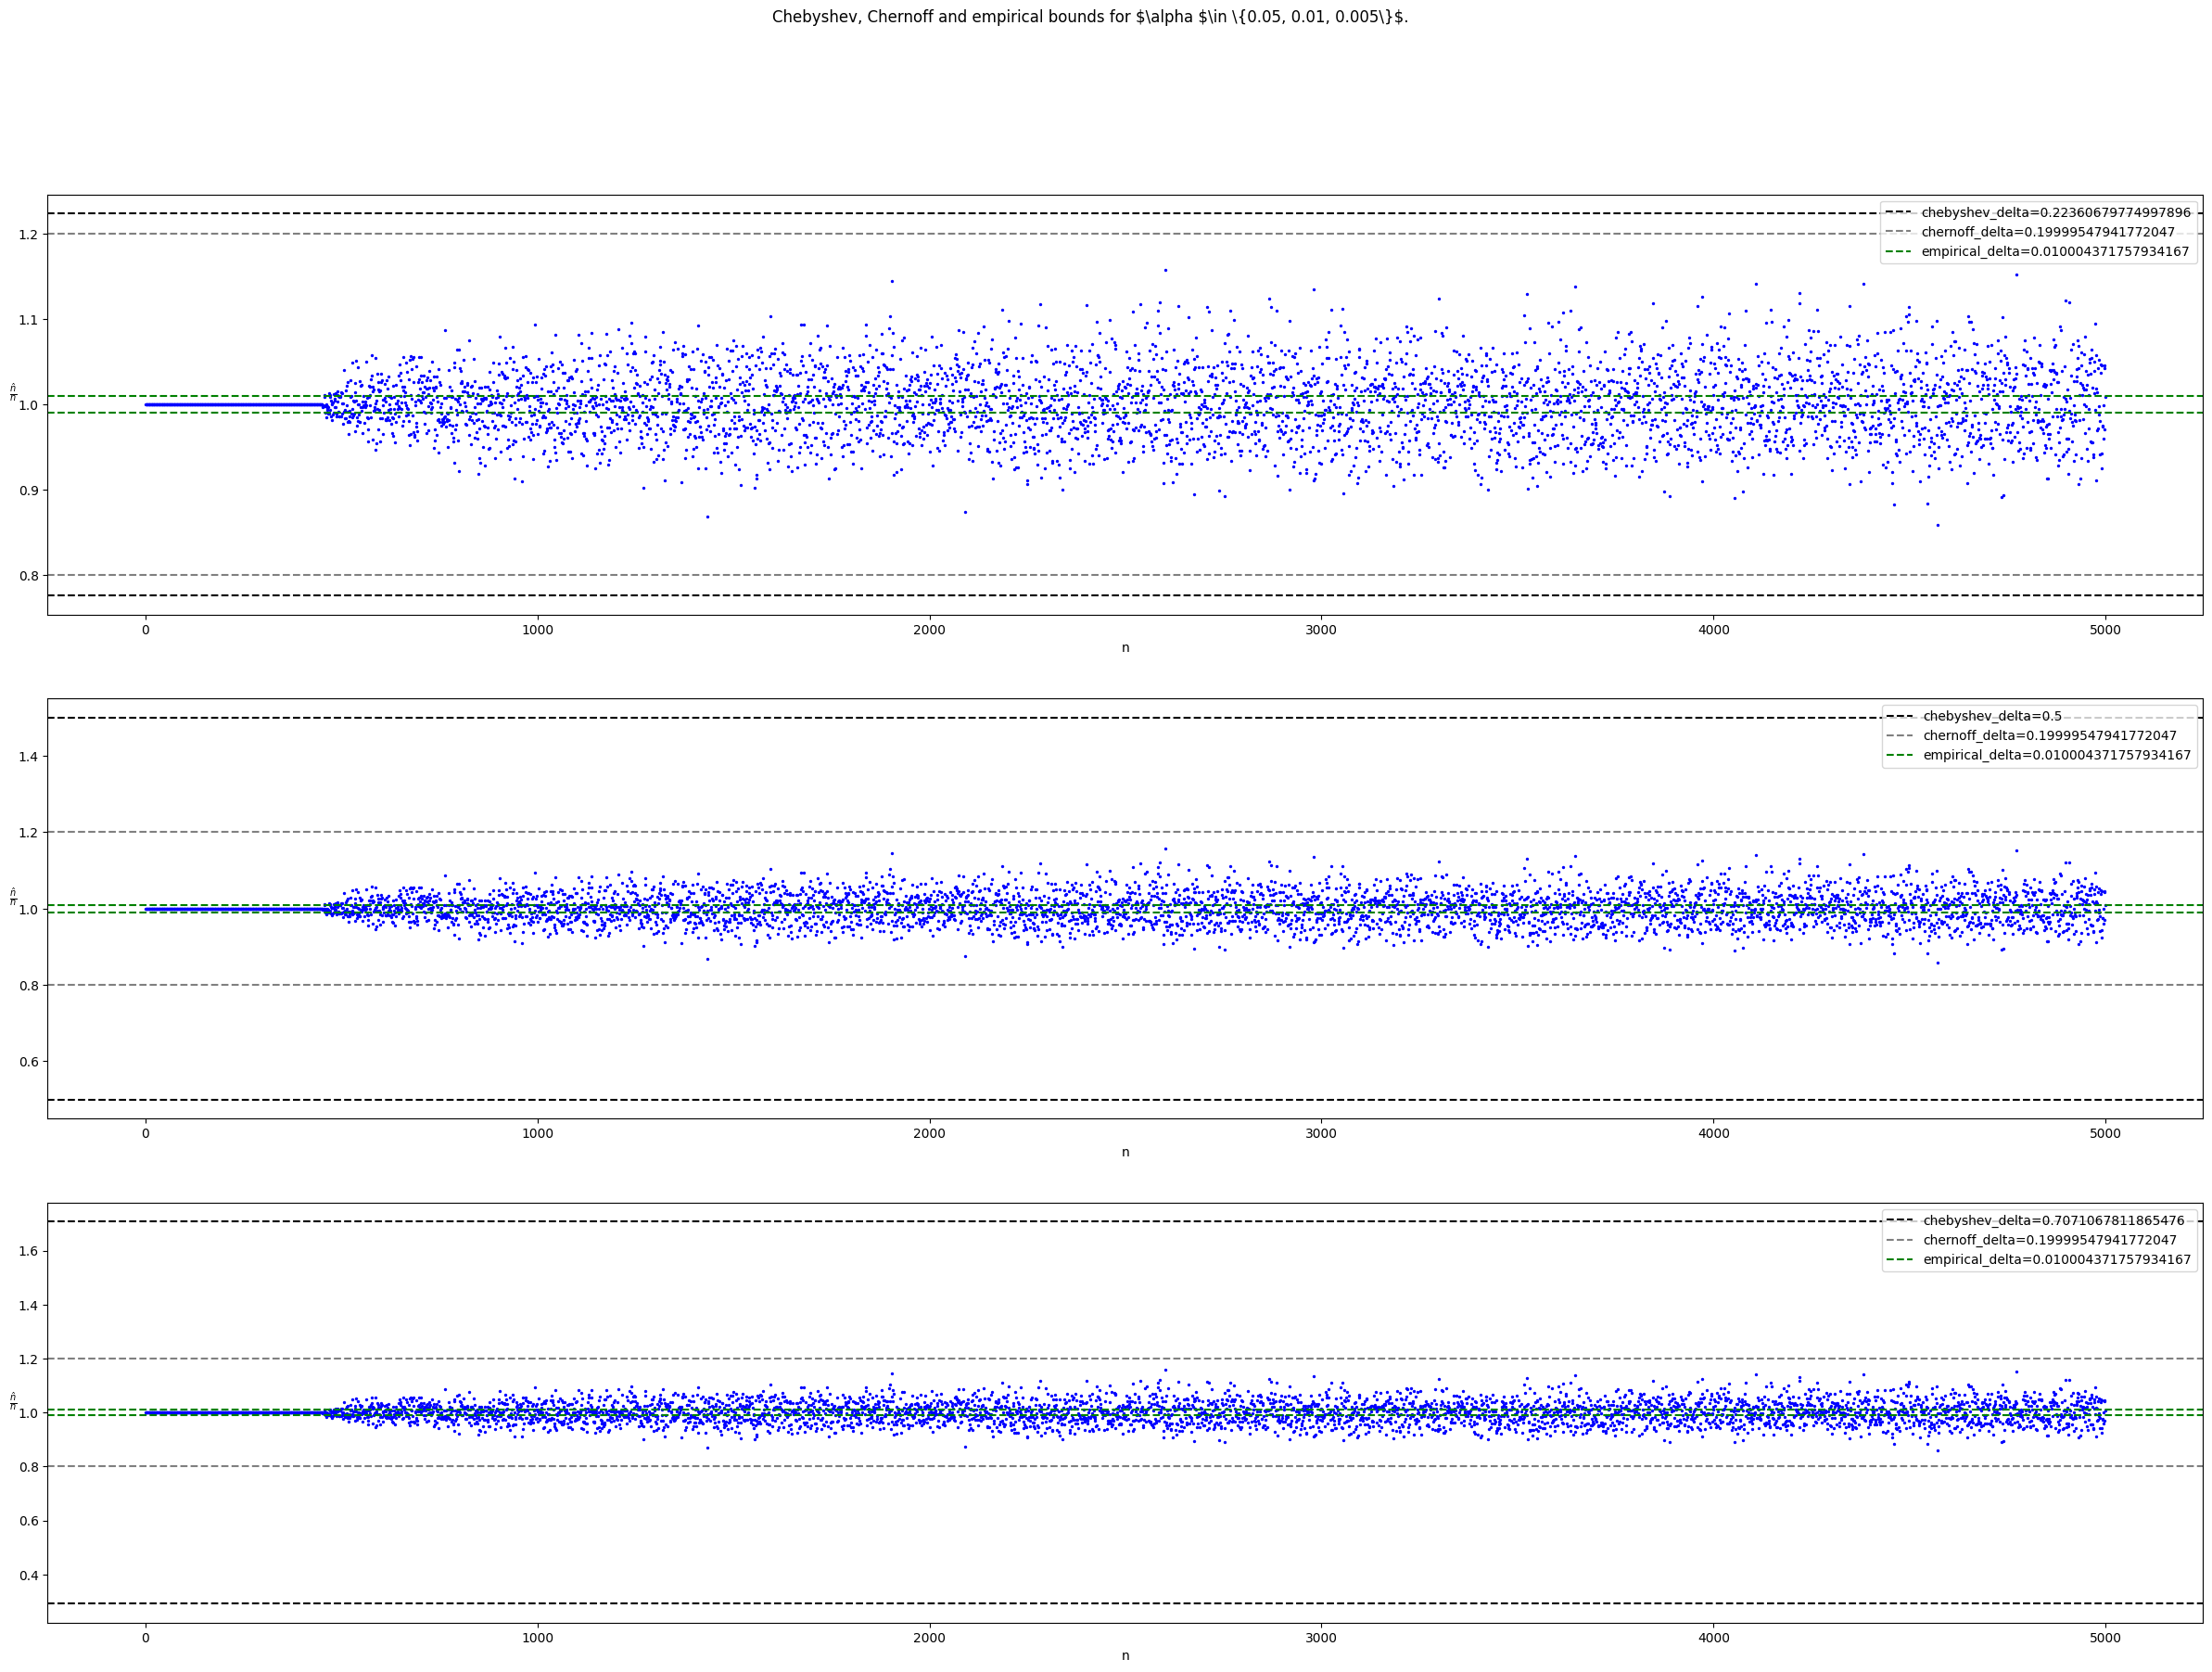

In [155]:
min_count = MinCount(M_length=HIGHEST_K,
                     h=dsu.define_hash(bit_length=HASH_BIT_LENGTH, hash_function_name=HASH_FUNCTION_NAME))
simulation_data = []
for n, range_start, range_end in dsu.disjoint_ranges_generator(upper_bound=5000):
    data_stream = dsu.generate_multiset(elements_range=(range_start, range_end))
    min_count.replace_data_stream(data_stream=data_stream)
    min_count.consume_data_stream()
    n_hat = min_count.estimate_number_of_elements()
    simulation_data.append(n_hat / n)
plot_task_7(data=simulation_data)